In [85]:
import numpy as np
import pandas as pd
import warnings

# Ignore display of unnecessary warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
    
warnings.filterwarnings("ignore")
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
# data preprocessing libs
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# sklearn classifiers to import
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# tensorflow classifier import
import tensorflow as tf
from tensorflow.estimator import DNNClassifier

# model building, predict, accuracy imports
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from IPython.display import display

In [86]:
df = pd.read_csv("Censored_clinical_lungCancer_survival.csv")
df.head(2)

,PatientID,Age,Sex,Smoke,COPD,DM,HTN,CEA_pre,SUV,Extent,...,pN,pStage,cell,Subtype,CEA_Post,Relapse,Recur,Recurrence,Death,Overall
0,14031352,73,2,1,0,0,1,1.0,4.11,3,...,2,4,1,4,0.0,0,0,107.833333,0,107.833333
1,9394389,73,1,1,0,0,0,1.4,3.50,3,...,2,4,1,3,1.2,0,0,144.033333,0,144.033333


In [87]:
# 결측치 평균값으로 치환
df["CEA_pre"] = df["CEA_pre"].fillna(df["CEA_pre"].mean())
df["SUV"] = df["SUV"].fillna(df["SUV"].mean())
df["CEA_Post"] = df["CEA_Post"].fillna(df["CEA_Post"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PatientID   490 non-null    int64  
 1   Age         490 non-null    int64  
 2   Sex         490 non-null    int64  
 3   Smoke       490 non-null    int64  
 4   COPD        490 non-null    int64  
 5   DM          490 non-null    int64  
 6   HTN         490 non-null    int64  
 7   CEA_pre     490 non-null    float64
 8   SUV         490 non-null    float64
 9   Extent      490 non-null    int64  
 10  Vascular    490 non-null    int64  
 11  Lymphatic   490 non-null    int64  
 12  Perineural  490 non-null    int64  
 13  VPI         490 non-null    int64  
 14  Adjacent    490 non-null    int64  
 15  Aerogenous  490 non-null    int64  
 16  pT          490 non-null    int64  
 17  pN          490 non-null    int64  
 18  pStage      490 non-null    int64  
 19  cell        490 non-null    i

In [88]:
x_df = df.drop(["PatientID", "Recur", "Overall", "Relapse", "Death"], axis=1)
y_df = df[["Death"]]
print(x_df.head(2))
print(y_df.head(2))

   Age  Sex  Smoke  COPD  DM  HTN  CEA_pre   SUV  Extent  Vascular  ...  VPI  \
0   73    2      1     0   0    1      1.0  4.11       3         0  ...    1   
1   73    1      1     0   0    0      1.4  3.50       3         0  ...    0   

   Adjacent  Aerogenous  pT  pN  pStage  cell  Subtype  CEA_Post  Recurrence  
0         0           0   2   2       4     1        4       0.0  107.833333  
1         0           1   2   2       4     1        3       1.2  144.033333  

[2 rows x 22 columns]
   Death
0      0
1      0


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=1)

In [90]:
# Build parameters of all classifiers
random_forest_params = dict(n_estimators=[5, 10, 15, 20, 25], criterion=['gini', 'entropy'], 
                            max_features=[2, 3, 4, 'auto', 'log2', 'sqrt', None], bootstrap=[False, True]
                            )
decision_tree_params = dict(criterion=['gini', 'entropy'], splitter=['best', 'random'], min_samples_split=[2, 3, 4],
                            max_features=[2,3,'auto', 'log2', 'sqrt', None], class_weight=['balanced', None])

perceptron_params = dict(penalty=[None, 'l2', 'l1', 'elasticnet'], fit_intercept=[False, True], shuffle=[False, True],
                         class_weight=['balanced', None], alpha=[0.0001, 0.00025], max_iter=[30,50,90])

svm_params = dict(shrinking=[False, True], degree=[3,4], class_weight=['balanced', None])

neural_net_params = dict(activation=['identity', 'logistic', 'tanh', 'relu'], hidden_layer_sizes = [(20,15,10),(30,20,15,10),(16,8,4)], 
                         max_iter=[50,80,150], solver=['adam','lbfgs'], learning_rate=['constant', 'invscaling', 'adaptive'], shuffle=[True, False])

log_reg_params = dict(class_weight=['balanced', None], solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'], fit_intercept=[True, False])

knn_params = dict(n_neighbors=[2, 3, 5, 10], weights=['uniform', 'distance'],
                  algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'], leaf_size=[5,10,15,20])

bagging_params = dict(n_estimators=[5, 12, 15, 20], bootstrap=[False, True])

ada_boost_params = dict(n_estimators=[50, 75, 100], algorithm=['SAMME', 'SAMME.R'])

guassiannb_params = dict()

gradient_boosting_params = dict(n_estimators=[15, 25, 50])

In [91]:
params = [
    random_forest_params, decision_tree_params, perceptron_params,
    svm_params, neural_net_params, log_reg_params, knn_params,
    bagging_params, ada_boost_params, guassiannb_params, gradient_boosting_params
]
# classifiers to test
classifiers = [
    RandomForestClassifier(), DecisionTreeClassifier(), Perceptron(),
    SVC(), MLPClassifier(), LogisticRegression(),
    KNeighborsClassifier(), BaggingClassifier(), AdaBoostClassifier(),
    GaussianNB(), GradientBoostingClassifier()
]

names = [
    'RandomForest', 'DecisionTree', 'Perceptron', 'SVM',
    'NeuralNetwork', 'LogisticRegression',
    'KNearestNeighbors', 'Bagging', 'AdaBoost', 'Naive-Bayes', 'GradientBoosting'
]

In [92]:
models = dict(zip(names, zip(classifiers, params)))

In [93]:
dict(zip(names, zip(classifiers, params)))

{'RandomForest': (RandomForestClassifier(),
  {'n_estimators': [5, 10, 15, 20, 25],
   'criterion': ['gini', 'entropy'],
   'max_features': [2, 3, 4, 'auto', 'log2', 'sqrt', None],
   'bootstrap': [False, True]}),
 'DecisionTree': (DecisionTreeClassifier(),
  {'criterion': ['gini', 'entropy'],
   'splitter': ['best', 'random'],
   'min_samples_split': [2, 3, 4],
   'max_features': [2, 3, 'auto', 'log2', 'sqrt', None],
   'class_weight': ['balanced', None]}),
 'Perceptron': (Perceptron(),
  {'penalty': [None, 'l2', 'l1', 'elasticnet'],
   'fit_intercept': [False, True],
   'shuffle': [False, True],
   'class_weight': ['balanced', None],
   'alpha': [0.0001, 0.00025],
   'max_iter': [30, 50, 90]}),
 'SVM': (SVC(),
  {'shrinking': [False, True],
   'degree': [3, 4],
   'class_weight': ['balanced', None]}),
 'NeuralNetwork': (MLPClassifier(),
  {'activation': ['identity', 'logistic', 'tanh', 'relu'],
   'hidden_layer_sizes': [(20, 15, 10), (30, 20, 15, 10), (16, 8, 4)],
   'max_iter': [50,

In [94]:
list(zip(names, zip(classifiers, params)))

[('RandomForest',
  (RandomForestClassifier(),
   {'n_estimators': [5, 10, 15, 20, 25],
    'criterion': ['gini', 'entropy'],
    'max_features': [2, 3, 4, 'auto', 'log2', 'sqrt', None],
    'bootstrap': [False, True]})),
 ('DecisionTree',
  (DecisionTreeClassifier(),
   {'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 3, 4],
    'max_features': [2, 3, 'auto', 'log2', 'sqrt', None],
    'class_weight': ['balanced', None]})),
 ('Perceptron',
  (Perceptron(),
   {'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'fit_intercept': [False, True],
    'shuffle': [False, True],
    'class_weight': ['balanced', None],
    'alpha': [0.0001, 0.00025],
    'max_iter': [30, 50, 90]})),
 ('SVM',
  (SVC(),
   {'shrinking': [False, True],
    'degree': [3, 4],
    'class_weight': ['balanced', None]})),
 ('NeuralNetwork',
  (MLPClassifier(),
   {'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(20, 15, 10), (30, 20, 15

Cross-validation을 통한 최적의 파라미터 찾기

In [95]:
#Finding best parameters using Gridsearch 
def parameter_tuning(models, x_train, x_test, y_train, y_test, num_folds):
    print(num_folds,'fold cross-validation is used')
    print()
    accuracies = []
    # dataframe to store intermediate results
    dataframes = []
    best_parameters = []
    best_predictions = []
    for name, clf_and_params in models.items():
        print('Computing GridSearch on {} '.format(name))
        clf, clf_params = clf_and_params
        grid_clf = GridSearchCV(estimator=clf, param_grid=clf_params, cv=num_folds) # num_folds:'fold cross-validation is used'
        grid_clf = grid_clf.fit(x_train, y_train)
        dataframes.append((name, grid_clf.cv_results_))
        best_parameters.append((name, grid_clf.best_params_))
        predictions = grid_clf.predict(x_test)
        
        if hasattr(grid_clf, 'predict_proba'):
            predictions_proba = grid_clf.predict_proba(x_test)
            best_predictions.append(predictions_proba)
        else:
            best_predictions.append(predictions)
        
        accuracy = accuracy_score(y_test, predictions)
        cv_scores = cross_val_score(clf, x_train, y_train, cv=num_folds)
        accuracies.append((name, accuracy, np.mean(cv_scores)))
    return accuracies, dataframes, best_parameters, best_predictions

In [96]:
results, dataframes, best_parameters, best_predictions = parameter_tuning(models, x_train, x_test, y_train, y_test, num_folds=5)
print()
print('============================================================')
for classifier, acc, cv_acc in results:
    print('{}: Accuracy with Best Parameters = {}% || Mean Cross Validation Accuracy = {}%'.format(classifier, round(acc*100,4), round(cv_acc*100,4)))
print()

for name, bp in best_parameters:
    print('============================================================')
    print('{} classifier GridSearch Best Parameters'.format(name))
    display(bp)
print()
print()

5 fold cross-validation is used

Computing GridSearch on RandomForest 
Computing GridSearch on DecisionTree 
Computing GridSearch on Perceptron 
Computing GridSearch on SVM 
Computing GridSearch on NeuralNetwork 
Computing GridSearch on LogisticRegression 
Computing GridSearch on KNearestNeighbors 
Computing GridSearch on Bagging 
Computing GridSearch on AdaBoost 
Computing GridSearch on Naive-Bayes 
Computing GridSearch on GradientBoosting 

RandomForest: Accuracy with Best Parameters = 85.7143% || Mean Cross Validation Accuracy = 81.6358%
DecisionTree: Accuracy with Best Parameters = 81.6327% || Mean Cross Validation Accuracy = 71.4249%
Perceptron: Accuracy with Best Parameters = 86.7347% || Mean Cross Validation Accuracy = 81.6228%
SVM: Accuracy with Best Parameters = 84.6939% || Mean Cross Validation Accuracy = 81.3762%
NeuralNetwork: Accuracy with Best Parameters = 84.6939% || Mean Cross Validation Accuracy = 80.3635%
LogisticRegression: Accuracy with Best Parameters = 87.7551% ||

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 4,
 'n_estimators': 10}

DecisionTree classifier GridSearch Best Parameters


{'class_weight': None,
 'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_split': 4,
 'splitter': 'random'}

Perceptron classifier GridSearch Best Parameters


{'alpha': 0.0001,
 'class_weight': None,
 'fit_intercept': False,
 'max_iter': 30,
 'penalty': 'l1',
 'shuffle': True}

SVM classifier GridSearch Best Parameters


{'class_weight': None, 'degree': 3, 'shrinking': False}

NeuralNetwork classifier GridSearch Best Parameters


{'activation': 'identity',
 'hidden_layer_sizes': (20, 15, 10),
 'learning_rate': 'constant',
 'max_iter': 50,
 'shuffle': False,
 'solver': 'lbfgs'}

LogisticRegression classifier GridSearch Best Parameters


{'class_weight': None, 'fit_intercept': True, 'solver': 'liblinear'}

KNearestNeighbors classifier GridSearch Best Parameters


{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 5, 'weights': 'distance'}

Bagging classifier GridSearch Best Parameters


{'bootstrap': True, 'n_estimators': 12}

AdaBoost classifier GridSearch Best Parameters


{'algorithm': 'SAMME', 'n_estimators': 100}

Naive-Bayes classifier GridSearch Best Parameters


{}

GradientBoosting classifier GridSearch Best Parameters


{'n_estimators': 25}

In [97]:
results

[('RandomForest', 0.8571428571428571, 0.8163583252190847),
 ('DecisionTree', 0.8163265306122449, 0.7142486205777345),
 ('Perceptron', 0.8673469387755102, 0.8162284972411553),
 ('SVM', 0.8469387755102041, 0.8137617656604998),
 ('NeuralNetwork', 0.8469387755102041, 0.8036351833820188),
 ('LogisticRegression', 0.8775510204081632, 0.8138591366439467),
 ('KNearestNeighbors', 0.8775510204081632, 0.8341772151898734),
 ('Bagging', 0.8571428571428571, 0.7781564427134047),
 ('AdaBoost', 0.9081632653061225, 0.7909769555339176),
 ('Naive-Bayes', 0.8163265306122449, 0.7476468679000325),
 ('GradientBoosting', 0.8061224489795918, 0.7908471275559884)]

In [98]:
pd.DataFrame(results)

,0,1,2
0,RandomForest,0.857143,0.816358
1,DecisionTree,0.816327,0.714249
2,Perceptron,0.867347,0.816228
3,SVM,0.846939,0.813762
4,NeuralNetwork,0.846939,0.803635
5,LogisticRegression,0.877551,0.813859
6,KNearestNeighbors,0.877551,0.834177
7,Bagging,0.857143,0.778156
8,AdaBoost,0.908163,0.790977
9,Naive-Bayes,0.816327,0.747647


In [99]:
dataframes

[('RandomForest',
  {'mean_fit_time': array([0.00664611, 0.00957417, 0.01286678, 0.01735406, 0.02044616,
          0.0061388 , 0.01037202, 0.01372647, 0.01643848, 0.02095485,
          0.00609226, 0.0102139 , 0.01389594, 0.01954775, 0.02201672,
          0.00600877, 0.01017275, 0.01416206, 0.01832685, 0.02094383,
          0.00618353, 0.00997248, 0.01407542, 0.01795182, 0.02134256,
          0.00594573, 0.009973  , 0.01428165, 0.01776042, 0.02207255,
          0.00935168, 0.01673837, 0.02299018, 0.03055687, 0.03925128,
          0.0061193 , 0.00996985, 0.01366491, 0.01755719, 0.02059703,
          0.0061842 , 0.01001496, 0.01396337, 0.01833372, 0.02214088,
          0.00658216, 0.01077142, 0.0149364 , 0.01863155, 0.02336707,
          0.00678763, 0.01076446, 0.01482062, 0.01937504, 0.02330847,
          0.00726304, 0.01117544, 0.01535797, 0.01924982, 0.02353716,
          0.00678201, 0.0111959 , 0.01528544, 0.01895566, 0.02293849,
          0.01092486, 0.01875696, 0.02613931, 0.0336027

In [100]:
best_parameters

[('RandomForest',
  {'bootstrap': True,
   'criterion': 'entropy',
   'max_features': 4,
   'n_estimators': 10}),
 ('DecisionTree',
  {'class_weight': None,
   'criterion': 'gini',
   'max_features': 'log2',
   'min_samples_split': 4,
   'splitter': 'random'}),
 ('Perceptron',
  {'alpha': 0.0001,
   'class_weight': None,
   'fit_intercept': False,
   'max_iter': 30,
   'penalty': 'l1',
   'shuffle': True}),
 ('SVM', {'class_weight': None, 'degree': 3, 'shrinking': False}),
 ('NeuralNetwork',
  {'activation': 'identity',
   'hidden_layer_sizes': (20, 15, 10),
   'learning_rate': 'constant',
   'max_iter': 50,
   'shuffle': False,
   'solver': 'lbfgs'}),
 ('LogisticRegression',
  {'class_weight': None, 'fit_intercept': True, 'solver': 'liblinear'}),
 ('KNearestNeighbors',
  {'algorithm': 'auto',
   'leaf_size': 5,
   'n_neighbors': 5,
   'weights': 'distance'}),
 ('Bagging', {'bootstrap': True, 'n_estimators': 12}),
 ('AdaBoost', {'algorithm': 'SAMME', 'n_estimators': 100}),
 ('Naive-Bay

In [101]:
best_predictions

[array([[1. , 0. ],
        [0.2, 0.8],
        [0.9, 0.1],
        [1. , 0. ],
        [0.8, 0.2],
        [0.8, 0.2],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.4, 0.6],
        [0.8, 0.2],
        [0.6, 0.4],
        [0.6, 0.4],
        [1. , 0. ],
        [1. , 0. ],
        [0.9, 0.1],
        [1. , 0. ],
        [0.9, 0.1],
        [0.8, 0.2],
        [0.6, 0.4],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.9, 0.1],
        [0.7, 0.3],
        [0.6, 0.4],
        [0.7, 0.3],
        [1. , 0. ],
        [0.9, 0.1],
        [0.9, 0.1],
        [1. , 0. ],
        [0.8, 0.2],
        [1. , 0. ],
        [0.9, 0.1],
        [0.9, 0.1],
        [0.8, 0.2],
        [0.9, 0.1],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.8, 0.2],
        [0.6, 0.4],
        [0.9, 0.1],
        [0.8, 0.2],
        [0.7, 0.3],
        [0.9, 0.1],
        [0.7, 0.3],
        [0.9, 0.1],
        [0.3, 0.7],
        [0.9, 0.1],


In [106]:
len(best_predictions)

11

In [102]:
from sklearn.metrics import roc_curve
for i in range(len(best_predictions)):
    a = pd.DataFrame(best_predictions[i])
    if a.shape[1] == 2:
        a = a[1]
        fprs, tprs, thresholds = roc_curve(y_test, a)
    else:
        fprs, tprs, thresholds = roc_curve(y_test, a)

a = pd.DataFrame(best_predictions[i])
a = round(a[1])
fprs, tprs, thresholds = roc_curve(y_test, a)

In [110]:
pd.DataFrame(best_predictions[2]).shape[1]

1

In [104]:
thresholds

array([2., 1., 0.])

KeyError: 1

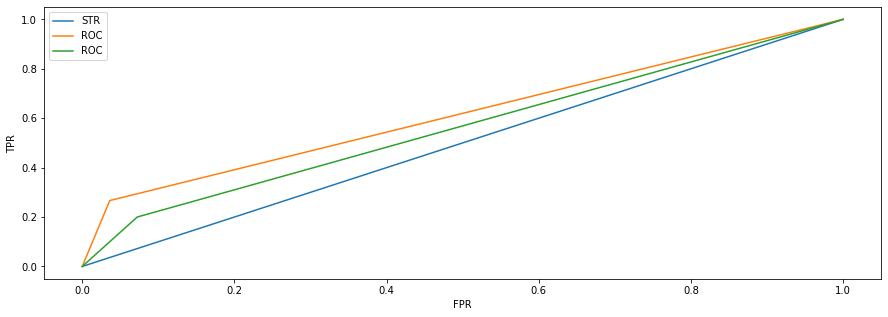

In [105]:
plt.figure(figsize=(15,5)).clf()
# 대각선
plt.plot([0,1],[0,1], label='STR')
for i in range(11):
    a = pd.DataFrame(best_predictions[i])
    a = round(a[1])
    fprs, tprs, thresholds = roc_curve(y_test, a)
    
    

    # ROC
    plt.plot(fprs, tprs, label="ROC")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.grid()
    

In [ ]:
best_predictions[0]

In [ ]:
df.columns

In [ ]:
help(roc_curve)